# Data Quality issues -> for analysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, get_single_color_func

sns.set_theme(style="whitegrid", palette="deep")

### (Some) Duplicates

In [2]:
df_ingred = pd.read_csv("Data/ingredients.csv")
df_recipes = pd.read_csv("Data/recipes.csv")

num_dup_ingreds = df_ingred.duplicated().sum()
df_ingred.drop_duplicates(inplace=True)

num_dup_recipes = df_recipes.duplicated().sum()
df_recipes.drop_duplicates(inplace=True)

df_merged = pd.merge(df_recipes, df_ingred, left_on="ID", right_on="ID_recipe")

print(f"Ingredients and recipes contained {num_dup_ingreds} and {num_dup_recipes}, respectively.")

Ingredients and recipes contained 26 and 0, respectively.


### Irregularity of user input: Spelling and definition of "recipe" (i.e. not just single dish)

In [64]:
# spelling
df_ingred.query("ingredients == 'grained'")

,ID_recipe,ingredients
141796,29570,grained
240041,41407,grained
391012,33498,grained


In [70]:
# multiple dishes in one
df_merged.set_index("ID").loc[13430].set_index("ingredients").filter(regex ="flour|candy|chicken", axis=0)

,cuisine,ID_recipe
ingredients,,
chicken breasts,brazilian,13430
candy,brazilian,13430
whole wheat flour,brazilian,13430
oat flour,brazilian,13430
flour,brazilian,13430
boneless skinless chicken breasts,brazilian,13430
all-purpose flour,brazilian,13430


In [71]:
# alternatives in single dish
df_merged.set_index("ID").loc[13430].set_index("ingredients").filter(regex ="flour", axis=0)

,cuisine,ID_recipe
ingredients,,
whole wheat flour,brazilian,13430
oat flour,brazilian,13430
flour,brazilian,13430
all-purpose flour,brazilian,13430


### Unbalanced
-> 68% of cuisines belong to one of 6 cuisines
-> 20% of all recipes are italian


#### Potential solutions
 - try to aggregate cuisines

In [ ]:
# Occurence of recipes -> look at cuisines with more than 2000 recipes
sns.set_theme(style="whitegrid", palette="deep")
g = sns.histplot(data=df_recipes, y="cuisine")
g.axvline(2000, color='r')
plt.title("Cuisine representation in data base")

# What share to the 6 largest recipes have?
recipe_threshold = 2000
num_cusinises_g2000 = int(df_recipes.groupby("cuisine").count().query(f"ID > {recipe_threshold}").count())
num_recipes_g2000_cuisines = df_recipes.groupby("cuisine").count().query(f"ID > {recipe_threshold}").sum()
share_g2000_cuisines = int(num_recipes_g2000_cuisines) / num_recipes

print(f"{num_cusinises_g2000} cuisines have more than {recipe_threshold} recipes, which amount to {share_g2000_cuisines*100:.0f}% of total recipes.")

### de-facto duplication/terminology of ingredients
influence is complex:
 - if terminology has systematic relationship to cuisine, it can be strong preditcor
    - still renders interpretation of feature influence more complicated
 - if terminology is unsystematically "noisy", it negatively affects classification

Issue: it is difficult to find all of these terminology differences and, hence, ex ante judgmentes on their influence is impossible.

##### Potential solutions
 - try to aggregate ingredients
 

There 11 versions of diced tomatoes.


Text(0.5, 1.0, "Types of 'diced tomatoes'")

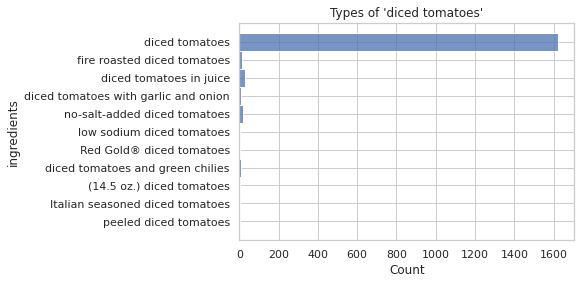

In [44]:
# diced Tomatoes
diced_tomato = df_ingred.set_index("ingredients").filter(regex = "dice(.*)tomato", axis=0).reset_index(level=0)["ingredients"].unique()

print(f"There {diced_tomato.size} versions of 'diced tomatoes'.")
#print(diced_tomato)
a = df_ingred.set_index("ingredients").filter(regex = r"dice(.*)tomato", axis=0).reset_index(level=0)
g = sns.histplot(data=a, y="ingredients")
plt.title("Types of 'diced tomatoes'")

There 37 versions of 'salt'':



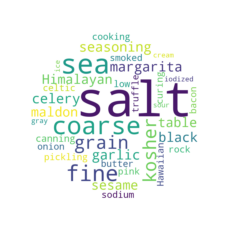

In [63]:
# salt
salt = df_ingred.set_index("ingredients").filter(regex = r"\bsalt$", axis=0).reset_index(level=0)["ingredients"].unique()

print(f"There {salt.size} versions of 'salt'':\n")
text_salt = " ".join(salt)

# Generate a word cloud image
#color_func1 = get_single_color_func('deepskyblue')
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(width=1920, height=1080, background_color='white', mask=mask).generate(text_salt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
